### sklearn.ensemble.RandomForestClassifier
* class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [1]:
import pandas as pd

train_df = pd.read_csv('./datasets/human_train.csv')
test_df = pd.read_csv('./datasets/human_test.csv')

In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df['Labels']= encoder.fit_transform(train_df['Activity'])

In [3]:
import numpy as np

X_train = train_df.drop(['Activity', 'Labels','subject'], axis=1)
y_train = train_df['Labels']

X_test = test_df.drop(['Activity', 'subject'] , axis=1)
y_test = LabelEncoder().fit_transform(test_df["Activity"])

In [4]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train , y_train)


RandomForestClassifier(random_state=42)

In [5]:
rfc.feature_importances_

array([2.70394335e-04, 2.70805320e-04, 1.48880292e-04, 3.15640905e-03,
       3.11514168e-04, 4.70211285e-04, 2.14210774e-03, 3.82743291e-04,
       4.60788524e-04, 8.05832499e-03, 2.55507080e-04, 2.61174628e-04,
       5.43220486e-04, 3.19937004e-04, 2.35542384e-04, 9.04252361e-04,
       7.80354797e-03, 7.12774050e-04, 3.93302579e-04, 1.31943046e-03,
       5.19913298e-04, 1.93945282e-04, 1.84352134e-03, 2.70429105e-04,
       3.90608935e-04, 1.79773976e-04, 1.74846407e-04, 1.85086400e-04,
       2.78937939e-04, 3.46530927e-04, 1.07407312e-04, 1.59768196e-04,
       2.12323752e-04, 3.13099875e-04, 2.09682737e-04, 2.28962667e-04,
       2.17362268e-04, 7.12541426e-03, 8.93584162e-04, 2.80579850e-03,
       3.63801995e-02, 2.53549070e-02, 9.62279034e-03, 2.19704601e-03,
       6.90344919e-04, 5.87176917e-04, 1.15357623e-03, 7.21587316e-04,
       2.01611127e-04, 3.03312875e-02, 2.17046259e-02, 6.40324266e-03,
       2.26496677e-02, 2.16353075e-02, 9.63932157e-03, 3.02754275e-03,
      

In [7]:
ftr_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)

In [8]:
ftr_importances.head()

tBodyAcc-mean()-X    0.000270
tBodyAcc-mean()-Y    0.000271
tBodyAcc-mean()-Z    0.000149
tBodyAcc-std()-X     0.003156
tBodyAcc-std()-Y     0.000312
dtype: float64

In [15]:
sorted_feature_importances = ftr_importances.sort_values(ascending=False)

In [28]:
data = sorted_feature_importances[:20]
df = pd.DataFrame(data ,columns=['feature importances'])


In [31]:
df.index

Index(['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'angle(X,gravityMean)',
       'tGravityAcc-mean()-Y', 'tGravityAcc-energy()-X',
       'angle(Y,gravityMean)', 'tGravityAcc-min()-X', 'tGravityAcc-max()-Y',
       'tGravityAcc-min()-Y', 'tGravityAcc-energy()-Y', 'tGravityAccMag-std()',
       'tBodyAccJerk-std()-X', 'angle(Z,gravityMean)', 'fBodyAcc-mean()-X',
       'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyAccJerk-max()-X',
       'fBodyAcc-mad()-X', 'fBodyAccJerk-bandsEnergy()-1,16.1',
       'tGravityAcc-arCoeff()-Z,2', 'fBodyAccMag-energy()'],
      dtype='object')

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='feature importances'>

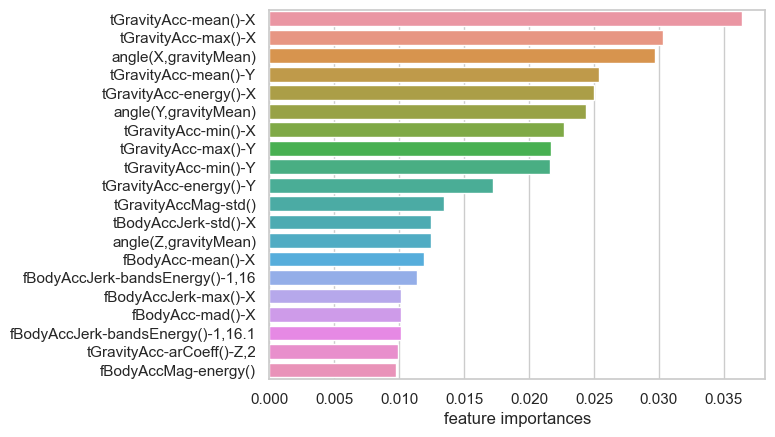

In [30]:
import seaborn as sns

sns.set_theme(style="whitegrid") ## figure, axes 스타일
sns.barplot(x='feature importances', y=df.index, data=df, orient='h')

In [32]:
from sklearn.model_selection import GridSearchCV

params={
    "max_depth":[8,12,16,20],
    "min_samples_split" : [16,24]
}

X_train_feature_importances = X_train[df.index]
grid_cv = GridSearchCV(rfc , param_grid=params , cv=5 , verbose=1)
grid_cv.fit(X_train_feature_importances , y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             verbose=1)

In [34]:
best_rfc = grid_cv.best_estimator_

In [35]:
pred = best_rfc.predict(X_test[df.index])

In [36]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

accuracy_score(y_test , pred)

0.8018323719036308